In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
df = pl.read_csv('qc.tsv', separator='\t')

In [3]:
df.columns

['seq_name',
 'seq_length',
 'n_ambiguous',
 'longest_ambiguous',
 'coding_density',
 'avg_kmer',
 'concatemer',
 'dtr',
 'itr']

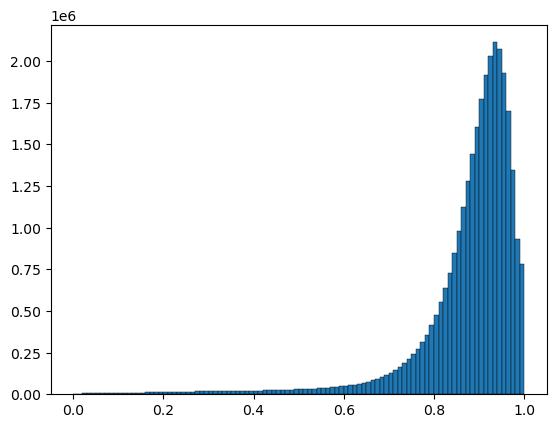

In [4]:
plt.hist(df.select('coding_density'), bins=100, range=[0,1], edgecolor='black', linewidth=.3);


In [5]:
df.filter(pl.col('concatemer')==True).select(pl.col('seq_name'))

seq_name
str
"""2088090014|GPI…"
"""2088090014|GPI…"
"""2088090015|GPI…"
"""2088090015|GPI…"
"""2124908021|BSR…"
"""2124908023|SwB…"
"""2124908023|SwB…"
"""2124908025|MBS…"
"""2124908027|MRS…"


In [6]:
df.filter(pl.col('avg_kmer') == pl.col('avg_kmer').max())

seq_name,seq_length,n_ambiguous,longest_ambiguous,coding_density,avg_kmer,concatemer,dtr,itr
str,i64,i64,i64,f64,f64,bool,bool,bool
"""3300044699|Ga0…",5082,0,0,1.0,84.3667,false,false,false


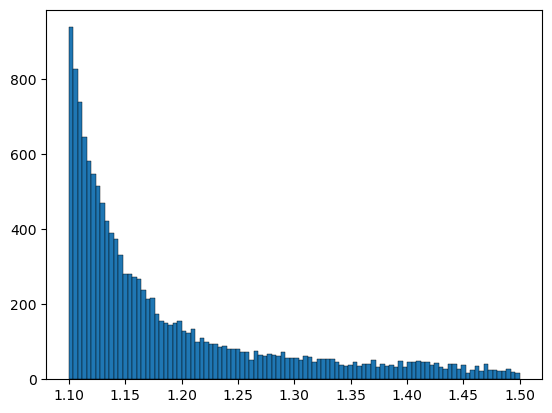

In [7]:
plt.hist(df.filter((pl.col('avg_kmer')>1.1)&(pl.col('avg_kmer')<=1.5)).select('avg_kmer'), bins=100,edgecolor='black', linewidth=.3);

In [8]:
df.filter((pl.col('coding_density')<0.6))

seq_name,seq_length,n_ambiguous,longest_ambiguous,coding_density,avg_kmer,concatemer,dtr,itr
str,i64,i64,i64,f64,f64,bool,bool,bool
"""2001200001|200…",9557,2275,11,0.1918,1.0,false,false,false
"""2001200001|200…",5854,500,3,0.3794,1.0,false,false,false
"""2001200001|200…",5211,204,3,0.1819,1.0,false,false,false
"""2001200001|200…",6844,826,5,0.5039,1.0,false,false,false
"""2001200001|200…",8106,1686,10,0.5291,1.0,false,false,false
"""2001200001|200…",5172,478,4,0.3602,1.0,false,false,false
"""2001200001|200…",5116,309,8,0.0915,1.0,false,false,false
"""2001200001|200…",5222,262,8,0.1522,1.0,false,false,false
"""2001200001|200…",6653,714,5,0.0997,1.0,false,false,false


In [9]:
#Contigs to discard
df.filter((pl.col('avg_kmer')>1.5) & (pl.col('concatemer')==True))

seq_name,seq_length,n_ambiguous,longest_ambiguous,coding_density,avg_kmer,concatemer,dtr,itr
str,i64,i64,i64,f64,f64,bool,bool,bool
"""2124908021|BSR…",137087,0,0,0.8729,2.2204,true,false,false
"""2124908025|MBS…",64068,1,1,0.9467,1.7201,true,false,false
"""2124908027|MRS…",86013,47,3,0.9334,1.7155,true,false,false
"""2124908027|MRS…",7396,156,53,0.8327,2.1981,true,false,false
"""2124908027|MRS…",279201,13,2,0.9451,7.4764,true,false,false
"""2162886008|PRS…",6493,0,0,0.9167,1.7471,true,false,false
"""2162886008|PRS…",6814,0,0,0.8678,1.5118,true,false,false
"""2189573022|PRS…",20242,0,0,0.759,2.6859,true,false,false
"""2189573022|PRS…",12682,0,0,0.9204,2.0032,true,false,false


In [10]:
#Contigs to keep
df.filter((pl.col('avg_kmer')<1.5) & (pl.col('concatemer')==False))

seq_name,seq_length,n_ambiguous,longest_ambiguous,coding_density,avg_kmer,concatemer,dtr,itr
str,i64,i64,i64,f64,f64,bool,bool,bool
"""2001200001|200…",9557,2275,11,0.1918,1.0,false,false,false
"""2001200001|200…",5854,500,3,0.3794,1.0,false,false,false
"""2001200001|200…",5211,204,3,0.1819,1.0,false,false,false
"""2001200001|200…",6844,826,5,0.5039,1.0,false,false,false
"""2001200001|200…",8106,1686,10,0.5291,1.0,false,false,false
"""2001200001|200…",5172,478,4,0.3602,1.0,false,false,false
"""2001200001|200…",5116,309,8,0.0915,1.0,false,false,false
"""2001200001|200…",7824,1626,10,0.6898,1.0,false,false,false
"""2001200001|200…",5222,262,8,0.1522,1.0,false,false,false


In [11]:
#Contigs to discard for now
contig_list = sorted(df.filter((pl.col('avg_kmer')>1.5) & (pl.col('concatemer')==True)).select('seq_name').to_series().to_list())

with open('exclude_contig_list.txt','w') as f:
    for i in contig_list:
        f.write(i)
        f.write('\n')

In [13]:
#contigs with dtr
contig_list2 = df.filter((pl.col('avg_kmer')<1.5) & (pl.col('concatemer')==False) & (pl.col('dtr')==True)).select('seq_name').to_series().to_list()

with open('dtr_lists.txt','w') as f:
    for i in contig_list2:
        f.write(i)
        f.write('\n')